   year         sales
0  2011    3360000000
1  2012   19100000000
2  2013   36200000000
3  2014   57100000000
4  2015   91200000000
5  2016  120700000000
6  2017  168200000000
7  2018  213500000000


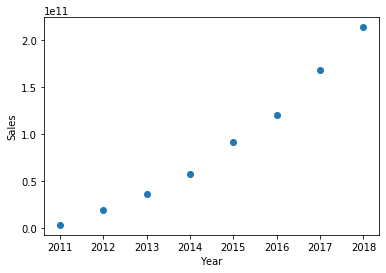

,year,sales
year,1.0000,0.9807
sales,0.9807,1.0000


In [98]:
import pandas as pd
icecream = pd.read_csv("ex0.csv")
# 打印出数据
print(icecream)

# 前2年数据
#2009,52000000
#2010,936000000

import matplotlib.pyplot as plt
import pylab
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.scatter(icecream.iloc[:,0],icecream.iloc[:,1])
plt.xlabel('Year')
plt.ylabel('Sales')
pylab.show()

icecream.iloc[:,0:2].corr()

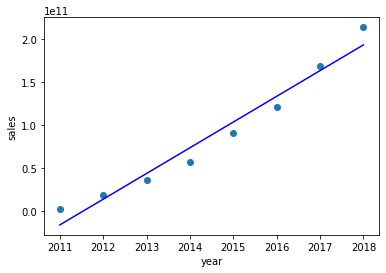

截距与斜率: -59964534285714.29 [2.98104762e+10]


In [99]:
# 直线拟合不可行
from sklearn.linear_model import LinearRegression
model = LinearRegression()
feature_cols = ['year']
X = icecream[feature_cols]
y = icecream.sales
model.fit(X,y)
plt.scatter(icecream.year, icecream.sales)
plt.plot(icecream.year, model.predict(X) , color='blue')
plt.xlabel('year')
plt.ylabel('sales')
plt.show()
print("截距与斜率:",model.intercept_,model.coef_)

In [103]:
x=2018
y=model.coef_*x+model.intercept_

print(y)

[1.93006667e+11]


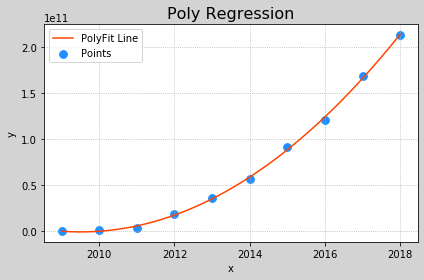

In [125]:
import sklearn.pipeline as pl
import sklearn.linear_model as lm
import sklearn.preprocessing as sp
import matplotlib.pyplot as mp
import numpy as np
import sklearn.metrics as sm

# 采集数据
x, y = np.loadtxt('ex0.txt', delimiter=',', usecols=(0, 1), unpack=True)
# 把输入变为二维数组，一行一样本，一列一特征
x = x.reshape(-1, 1)

# 创建模型
model = pl.make_pipeline(
    sp.PolynomialFeatures(5),  # 多项式特征拓展器
    lm.LinearRegression()  # 线性回归器
)
# 训练模型
model.fit(x, y)
# 求预测值y
pred_y = model.predict(x)

# 模型评估
# print('平均绝对值误差：', sm.mean_absolute_error(y, pred_y))
# print('平均平方误差：', sm.mean_squared_error(y, pred_y))
# print('中位绝对值误差：', sm.median_absolute_error(y, pred_y))
# print('R2得分：', sm.r2_score(y, pred_y))

# 绘制多项式回归线
px = np.linspace(x.min(), x.max(), 1000)
px = px.reshape(-1, 1)
pred_py = model.predict(px)

# 绘制图像
mp.figure("Poly Regression", facecolor='lightgray')
mp.title('Poly Regression', fontsize=16)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.xlabel('x')
mp.ylabel('y')

mp.scatter(x, y, s=60, marker='o', c='dodgerblue', label='Points')
mp.plot(px, pred_py, c='orangered', label='PolyFit Line')
mp.tight_layout()
mp.legend()
mp.show()